In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
from sklearn.gaussian_process import GaussianProcessRegressor

# Guide and Ideas for Capstone Project

We begin this guide by downloading the data:

In [2]:
X = np.load('updated_data/function_5/inputs.npy')
Y = np.load('updated_data/function_5/outputs.npy')
X

array([[1.91447084e-01, 3.81933714e-02, 6.07417811e-01, 4.14584137e-01],
       [7.58652949e-01, 5.36517738e-01, 6.56000382e-01, 3.60341553e-01],
       [4.38349873e-01, 8.04339705e-01, 2.10245266e-01, 1.51294816e-01],
       [7.06050834e-01, 5.34191961e-01, 2.64243345e-01, 4.82087549e-01],
       [8.36477993e-01, 1.93609647e-01, 6.63892697e-01, 7.85648883e-01],
       [6.83432250e-01, 1.18662642e-01, 8.29045910e-01, 5.67576606e-01],
       [5.53621480e-01, 6.67349979e-01, 3.23805819e-01, 8.14869754e-01],
       [3.52356269e-01, 3.22241532e-01, 1.16979368e-01, 4.73112522e-01],
       [1.53785706e-01, 7.29381690e-01, 4.22598437e-01, 4.43074166e-01],
       [4.63442267e-01, 6.30024510e-01, 1.07906456e-01, 9.57643899e-01],
       [6.77491148e-01, 3.58509507e-01, 4.79592224e-01, 7.28804811e-02],
       [5.83973412e-01, 1.47242646e-01, 3.48097462e-01, 4.28614651e-01],
       [3.06888719e-01, 3.16878127e-01, 6.22634481e-01, 9.53990581e-02],
       [5.11141775e-01, 8.17956997e-01, 7.28710418e

# Upper Confidence Bound

A second alternative would be to use Bayesian Optimization and consider an Upper Confidence Bound acquisition function: 

In [3]:
gpr = GaussianProcessRegressor()
gpr.fit(X, Y)

GaussianProcessRegressor()

## Visualizing our data and thinking of the problem

Reponse Plots

Text(0.5, 1.0, 'X4')

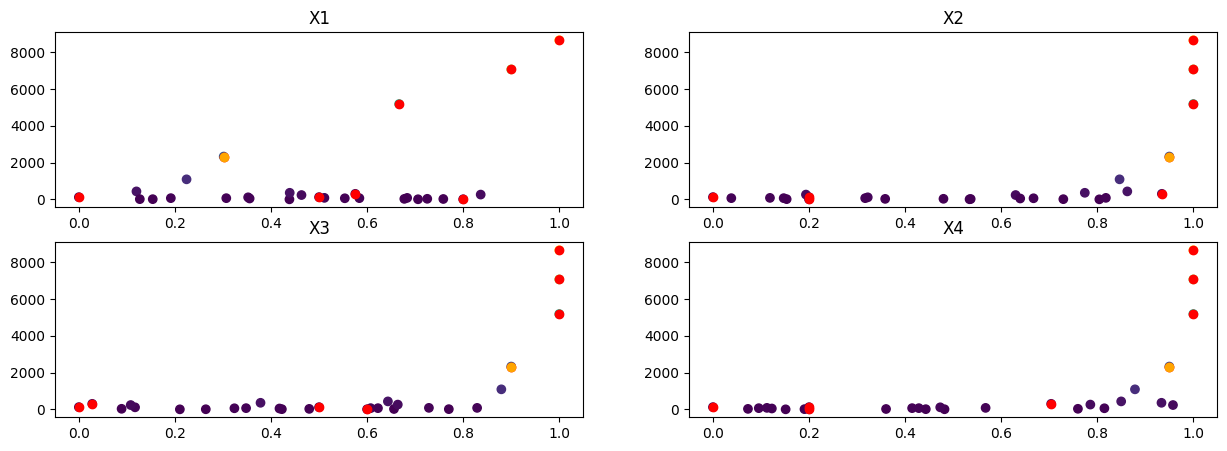

In [4]:
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(nrows=2,ncols=2)
fig.set_figheight(5)
fig.set_figwidth(15)
ax1.scatter(X[:, 0], Y, c = Y)
ax2.scatter(X[:,1], Y, c = Y)
ax3.scatter(X[:,2], Y, c = Y)
ax4.scatter(X[:,3], Y, c = Y)

from shared import Count_Submissions
ax1.scatter(X[Count_Submissions():, 0], Y[Count_Submissions():], c = 'red')
ax2.scatter(X[Count_Submissions():,1], Y[Count_Submissions():], c = 'red')
ax3.scatter(X[Count_Submissions():,2], Y[Count_Submissions():], c = 'red')
ax4.scatter(X[Count_Submissions():,3], Y[Count_Submissions():], c = 'red')

ax1.scatter(X[-1:, 0], Y[-1:], c = 'orange')
ax2.scatter(X[-1:,1], Y[-1:], c = 'orange')
ax3.scatter(X[-1:,2], Y[-1:], c = 'orange')
ax4.scatter(X[-1:,3], Y[-1:], c = 'orange')

ax1.set_title("X1")
ax2.set_title("X2")
ax3.set_title("X3")
ax4.set_title("X4")


In [5]:
#both ucb and pi have converged on the end early - can't explor there any more - so now force it to look elsewhere - explor x1 a bit
x1 = np.linspace(0.0,0.4,200)
x2 = np.linspace(0.95,1,5)
x3 = np.linspace(0.9,1,40)
x4 = np.linspace(0.95,1,5)
grid = np.meshgrid(x1, x2, x3,x4)
grid = np.array(grid).T.reshape(-1,4)

In [6]:
from shared import FormatOutputs, ProbImprovementAF

X_grid = np.array(grid)
mean, std = gpr.predict(X_grid, return_std = True)
ucb = mean + 1.96 * std
pi = ProbImprovementAF(mean,std,np.max(Y))

#ucb
idx_max = np.argmax(ucb)
next_query = X_grid[idx_max]
FormatOutputs(next_query, "ucb")

#probability of improvemnet
idx_max = np.argmax(pi)
next_query = X_grid[idx_max]
FormatOutputs(next_query, "prob of improvement")

0.400000-0.999999-0.999999-0.999999: ucb
0.000001-0.950000-0.900000-0.950000: prob of improvement
